# Coordinate Systems and Axes

In [1]:
import os
import glob
from dotenv import load_dotenv, find_dotenv

import datetime
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl

/var/folders/fw/40ykb3nj66dcx6d6rr1n66pr0000gr/T/ipykernel_64672/3279216146.py:8: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# makes the inline-figures in notebooks look crisper
%config InlineBackend.figure_format = 'svg'

In [3]:
load_dotenv(find_dotenv(usecwd=True));

In [4]:
data_folder=os.getenv('DATA_FOLDER')

# Coordinate Systems
## Cartesian Coordinates

In [5]:
df_points = pd.DataFrame({'x': [-1, 0, 2], 'y': [-1, 0, 1], 
                          'label':['(-1,-1)', '(0,0)', '(2,1)'],
                          'voff': [-35, 5, 5], # vertical offset for labels
                          'hoff': [-10, 5, 5] # horizontal offset for labels
                         })

df_segments = pd.DataFrame({'x0': [0, 2, 0, -1], 'x1': [2, 2, -1, -1], 'y0': [1, 0, -1, 0], 'y1': [1, 1, -1, -1]})

# some additional labels
df_labels = pd.DataFrame({'x': [-1.6, -0.8, 0.8, 2.05], 'y': [-.5, -1.2, 1.1, 0.5], 
                          'label': ["y = –1", "x = –1", "x = 2", "y = 1"]})

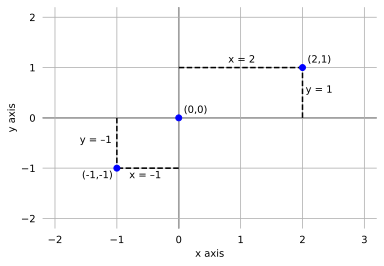

In [6]:
fig, ax = plt.subplots(figsize=(6, 4))

# remove the lines connecting the axis tick marks and noting the boundaries 
# of the data area
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# set axes ranges and tick positions
ax.set(xlim=[-2.2, 3.2], ylim=[-2.2, 2.2], xticks=[-2, -1, 0, 1, 2, 3],
       yticks=[-2, -1, 0, 1, 2],
       xlabel='x axis', ylabel='y axis'#, title='Cartesian Coordinates'
      )

# draw the grid
ax.grid(True, zorder=0)
# remove the little tick lines of the ticks
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.label1.set_visible(True)

for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.label1.set_visible(True)
    
# draw a line at 'y'=0
ax.axhline(color='grey', zorder=1)

# draw a line at 'x'=0
ax.axvline(color='grey', zorder=1)

# plot the line segments:
# loop over the rows in df_segments and plot a line connecting (x0,y0) -> (x1,y1)
for _, seg in df_segments.iterrows():
    ax.plot([seg['x0'], seg['x1']], [seg['y0'], seg['y1']], linestyle='--',
            color='black', zorder=2
           )

# annotate the line segments
for _, seg in df_labels.iterrows():
    ax.annotate(seg['label'], (seg['x'], seg['y']))

# plot the points
ax.scatter('x', 'y', color='blue', data=df_points, zorder=3)

# annotate the points:
for _, seg in df_points.iterrows():
    ax.annotate(seg['label'], (seg['x'], seg['y']), xytext=(seg['voff'], seg['hoff']),
                textcoords="offset pixels")
    # The textcoords indicates that we want to apply the offset in units of pixels, 
    # and the xytext indicates how much we want to offset the annotations by. 
    # The xytext takes in a tuple, with the first item being the horizontal offset, 
    # and second being the vertical offset.

plt.show()

# Units
## The Cartesian Coordinate System and Units

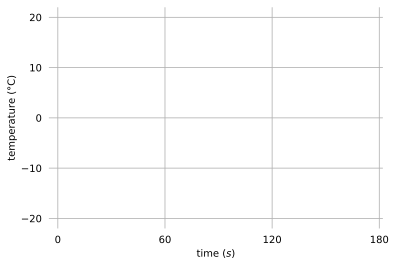

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

# remove the lines connecting the axis tick marks and noting the boundaries
# of the data area
for spine in ['top', 'right', 'left', 'bottom']:
    ax.spines[spine].set_visible(False)

# set axes ranges and tick positions
ax.set(xlim=[-5, 182], ylim=[-22, 22], xticks=[0, 60, 120, 180],
       yticks=[-20, -10, 0, 10, 20],
      xlabel='time ($s$)', ylabel='temperature ($\degree$C)',
       # title='Cartesian Coordinates'
      )

# draw the grid
ax.grid(True, zorder=0)
# remove the little tick lines of the ticks
for tick in ax.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.label1.set_visible(True)

for tick in ax.yaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.label1.set_visible(True)

plt.show()

## Example: Temperature Normals {.hscroll}

In [8]:
# Read in the data

# A list of all csv files in the uscn-folder:
files_list_uscn = glob.glob(os.path.join(os.path.join(data_folder, 'uscn'), "*.csv"))

def read_csv_cols(f, usecols = ['STATION', 'NAME', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',  'DLY-TAVG-NORMAL']):
    return pd.read_csv(f, usecols=usecols)

# read all the files into one dataframe
df = pd.concat(map(read_csv_cols, files_list_uscn), ignore_index=True, axis=0)

# convert datetime
df['DATETIME'] = pd.to_datetime(df['DATE'], format='%m-%d', errors='coerce')

In [9]:
df.columns;

In [10]:
# rearrange columns
df = df[['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DATETIME', 'DLY-TAVG-NORMAL']]

In [11]:
station_codes = {'USW00014819': 'Chicago',
                 'USC00516128': 'Honolulu',
                 'USW00027502':'Barrow, Airport',
                 'USW00014819': 'Chicago',
                 'USC00042319': 'Death Valley, CA',
                 'USW00093107': 'San Diego, CA',
                 'USW00012918': 'Houston, TX'
                }

In [12]:
df_temps = df.copy(deep=True)

In [13]:
# df.head()
def adjust_style(styler):
    styler.hide() # hide index column
    
    # some column specific formatting
    
    styler.format(formatter='{:.2f}', subset=['DLY-TAVG-NORMAL', 'ELEVATION'])
    styler.format(formatter='{:.4f}', subset=['LATITUDE', 'LONGITUDE'])
    
    # text entries are aligned left and numerical entries right, to increase readability
    styler.set_table_styles(
        {
            'DLY-TAVG-NORMAL': [{'selector': '','props': 'text-align: right;'}],
            'ELEVATION': [{'selector': '','props': 'text-align: right;'}],
            'LATITUDE': [{'selector': '','props': 'text-align: right;'}],
            'LONGITUDE': [{'selector': '','props': 'text-align: right;'}],
        }, overwrite=False
    )
    
    # formatting the table header
    # and the value cells
    styler.set_table_styles(
        [
            {'selector': 'th', 'props': 'font-weight: bold; border: None; font-size: 12pt;'},
            {'selector': 'td', 'props': 'background-color: white; border: None; font-size: 12pt;'},
            
        ],
        overwrite=False
    )
    return styler
df.sample(10).drop(['DATETIME'], axis=1).style.pipe(adjust_style)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,12-28,55.10
USC00042319,"DEATH VALLEY NP, CA US",36.4622,-116.8669,-59.10,04-29,82.00
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.40,06-09,73.10
USW00093107,"SAN DIEGO MIRAMAR NAS, CA US",32.8667,-117.1333,145.40,07-09,71.40
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.40,05-28,72.80
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,07-23,85.10
USW00014819,"CHICAGO MIDWAY AP, IL US",41.7861,-87.7522,186.50,01-10,26.10
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,09-20,80.30
USW00093107,"SAN DIEGO MIRAMAR NAS, CA US",32.8667,-117.1333,145.40,06-21,68.50
USW00093107,"SAN DIEGO MIRAMAR NAS, CA US",32.8667,-117.1333,145.40,10-27,65.80


Temperature normals (in Fahrenheit) over the year from  
different weather stations in the US. Data Source: NOAA.

## Different Units on the X and Y-axis

In [14]:
df_houston = df[df['STATION'] == 'USW00012918']

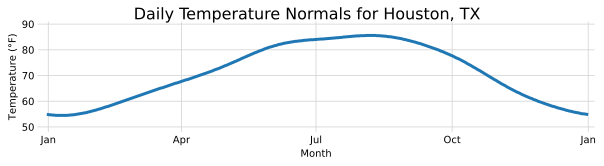

In [15]:
fig, ax = plt.subplots(figsize=(10,2))
fig.suptitle('Daily Temperature Normals for Houston, TX', fontsize=16)

def plot_normals(ax):
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(linestyle='-', color='lightgrey')

    ax.xaxis.set_major_locator(mpl.dates.MonthLocator(bymonth=(1,4,7,10)))
    ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b'))

    ax.set_xlim([datetime.date(1899, 12, 25), datetime.date(1901, 1, 5)])

    ax.set_xlabel('Month')

    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(10))

    ax.set_ylim([48, 91])

    ax.set_ylabel('Temperature ($\degree$F)')

    # hide the tick markers of both axes by setting length to 0
    ax.tick_params(axis='both', which='both',length=0)
    
    out = ax.plot(df_houston['DATETIME'], df_houston['DLY-TAVG-NORMAL'], color='C0', linewidth=3)
    
    return out

plot_normals(ax)

plt.show()

## Effect of the Aspect Ratio

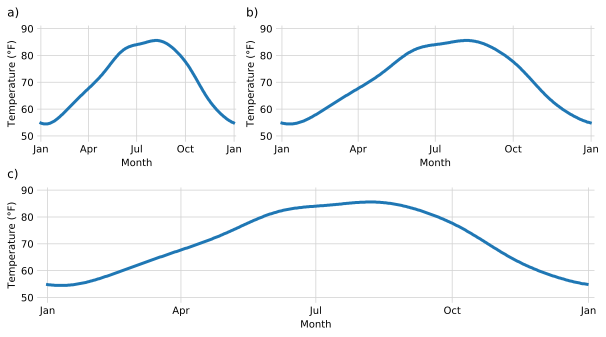

In [16]:
fig = plt.figure(figsize=(10,5))
gs = mpl.gridspec.GridSpec(2, 5, fig, wspace=0.5, hspace=0.4)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2:])
ax3 = plt.subplot(gs[1, :])

trans = mpl.transforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans, fontsize='large', va='bottom')
ax2.text(0.0, 1.0, 'b)', transform=ax2.transAxes + trans, fontsize='large', va='bottom')
ax3.text(0.0, 1.0, 'c)', transform=ax3.transAxes + trans, fontsize='large', va='bottom')

plot_normals(ax1)
plot_normals(ax2)
plot_normals(ax3)

plt.show()

## Same Units on Both Axes

In [17]:
df_sandiego = df[df['STATION']=='USW00093107']

In [18]:
df_sandiego[df_sandiego['DATETIME']=='1900-01-01']['DLY-TAVG-NORMAL'].iloc[0];

In [19]:
annotations = []
for date, label in [('1900-01-01', 'Jan 1st'), ('1900-04-01', 'Apr 1st'), ('1900-07-01', 'Jul 1st'), ('1900-10-01', 'Oct 1st')]:
    x = df_sandiego[df_sandiego['DATETIME']==date]['DLY-TAVG-NORMAL'].iloc[0]
    y = df_houston[df_houston['DATETIME']==date]['DLY-TAVG-NORMAL'].iloc[0]
    annotations.append((x, y, label))
annotations;

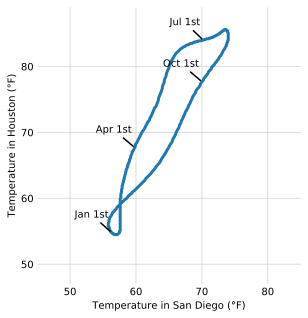

In [20]:
def plot_normals_vs(ax, xseries, yseries, xlim, ylim, annots, xlabel, ylabel, grid_space):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(linestyle='-', color='lightgrey')
    
    ax.set(xlim=xlim, ylim=ylim)
    # Square grid: Set equal scaling (i.e., make circles circular) by changing dimensions of the plot box
    ax.set_aspect('equal', adjustable='box', anchor='C')

    ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(grid_space))
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(grid_space))

    ax.set_xlabel(xlabel)


    ax.set_ylabel(ylabel)

    # hide the tick markers of both axes by setting length to 0
    ax.tick_params(axis='both', which='both',length=0)


    for x, y, label in annots:

        ax.annotate(label, # this is the text
                     (x, y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(-3,15), # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', arrowstyle="-", linewidth=1.5),
                     ha='right') # horizontal alignment can be left, right or center
    
    out = ax.plot(xseries, yseries, color='C0', linewidth=3)
    return out
    

fig, ax = plt.subplots(figsize=(5,5))

plot_normals_vs(ax, df_sandiego['DLY-TAVG-NORMAL'], df_houston['DLY-TAVG-NORMAL'], (45, 85), (47, 89), annotations,
               xlabel='Temperature in San Diego ($\degree$F)', ylabel='Temperature in Houston ($\degree$F)', grid_space=10)

plt.show()

## Effect of Change in Units
Converting Fahrenheit to Celsius is a linear transformation:

In [21]:
def f_2_c(f):
    return (f - 32.0)/1.8

df['DLY-TAVG-NORMAL-Celsius'] = df['DLY-TAVG-NORMAL'].apply(f_2_c)

In [22]:
def adjust_style(styler):
    styler.hide() # hide index column
    
    # some column specific formatting
    
    styler.format(formatter='{:.2f}', subset=['DLY-TAVG-NORMAL-Celsius', 'DLY-TAVG-NORMAL', 'ELEVATION'])
    styler.format(formatter='{:.4f}', subset=['LATITUDE', 'LONGITUDE'])
    
    # text entries are aligned left and numerical entries right, to increase readability
    styler.set_table_styles(
        {
            'DLY-TAVG-NORMAL': [{'selector': '','props': 'text-align: right;'}],
            'DLY-TAVG-NORMAL-Celsius': [{'selector': '','props': 'text-align: right;'}],
            'ELEVATION': [{'selector': '','props': 'text-align: right;'}],
            'LATITUDE': [{'selector': '','props': 'text-align: right;'}],
            'LONGITUDE': [{'selector': '','props': 'text-align: right;'}],
        }, overwrite=False
    )
    
    # formatting the table header
    # and the value cells
    styler.set_table_styles(
        [
            {'selector': 'th', 'props': 'font-weight: bold; border: None; font-size: 12pt;'},
            {'selector': 'td', 'props': 'background-color: white; border: None; font-size: 12pt;'},
            
        ],
        overwrite=False
    )
    return styler

df.sample(10).drop(['DATETIME'], axis=1).style.pipe(adjust_style)

STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,DLY-TAVG-NORMAL,DLY-TAVG-NORMAL-Celsius
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,07-15,84.70,29.28
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.40,03-06,69.60,20.89
USC00042319,"DEATH VALLEY NP, CA US",36.4622,-116.8669,-59.10,01-23,56.10,13.39
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,05-11,76.40,24.67
USW00014819,"CHICAGO MIDWAY AP, IL US",41.7861,-87.7522,186.50,04-17,51.20,10.67
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.40,02-23,69.60,20.89
USW00012918,"HOUSTON HOBBY AP, TX US",29.6381,-95.2819,13.40,07-22,85.10,29.50
USW00093107,"SAN DIEGO MIRAMAR NAS, CA US",32.8667,-117.1333,145.40,09-08,73.40,23.00
USC00516128,"MANOA LYON ARBO 785.2, HI US",21.3331,-157.8025,152.40,02-14,69.60,20.89
USC00042319,"DEATH VALLEY NP, CA US",36.4622,-116.8669,-59.10,08-12,103.20,39.56


## Changing the Units has no Effect
Cartesian coordinate systems are invariant under linear transformations

In [23]:
df_sandiego = df[df['STATION']=='USW00093107'];
df_houston = df[df['STATION'] == 'USW00012918'];

In [24]:
annotations_c = [(f_2_c(x), f_2_c(y), label) for x, y, label in annotations]

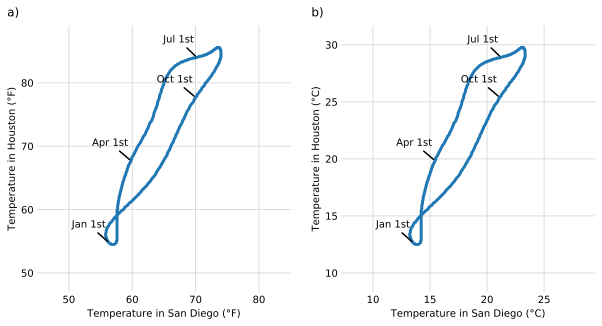

In [25]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

plot_normals_vs(ax1, df_sandiego['DLY-TAVG-NORMAL'], df_houston['DLY-TAVG-NORMAL'], (45, 85), (47, 89), annotations,
               xlabel='Temperature in San Diego ($\degree$F)', ylabel='Temperature in Houston ($\degree$F)', grid_space=10)
plot_normals_vs(ax2, df_sandiego['DLY-TAVG-NORMAL-Celsius'], df_houston['DLY-TAVG-NORMAL-Celsius'], (f_2_c(45), f_2_c(85)),
                (f_2_c(47), f_2_c(89)), annotations_c,
               xlabel='Temperature in San Diego ($\degree$C)', ylabel='Temperature in Houston ($\degree$C)',
               grid_space=5)

trans = mpl.transforms.ScaledTranslation(-30/72, 7/72, fig.dpi_scale_trans)
ax1.text(0.0, 1.0, 'a)', transform=ax1.transAxes + trans, fontsize='large', va='bottom')
ax2.text(0.0, 1.0, 'b)', transform=ax2.transAxes + trans, fontsize='large', va='bottom')

plt.show()

# Nonlinear Axes
## The Logarithmic Scale

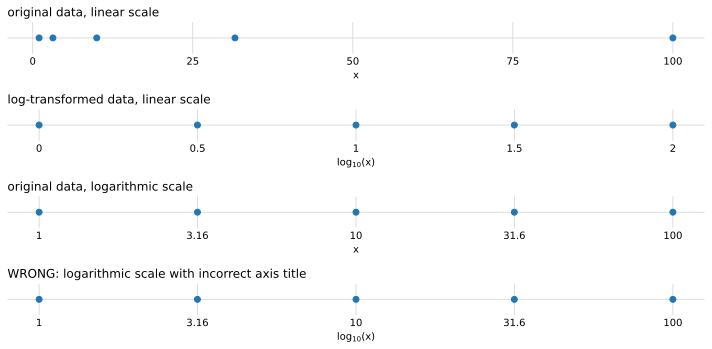

In [26]:
def plotter(x, y, ax, xlim, xticks, xscale, xlabel, title):
    ax.set_title(title, fontsize=12, loc='left')
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(which='major', axis='both', linestyle='-', color='lightgrey')

    ax.set(ylim=(-0.01, 0.01), xscale=xscale) # xlim=xlim, 
    # ax.set_aspect('equal', adjustable='box', anchor='C') # Squre grid: Set equal scaling (i.e., make circles circular) by changing dimensions of the plot box
    
    ax.set_yticks([0.0])
    
    ax.set_xticks(xticks, minor=False)
    
    ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:.3g}')) # g removes trailing zeros
    
    # hide the tick markers 
    ax.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)
    

    # hide the tick markers of both axes by setting length to 0
    ax.tick_params(axis='both', which='both',length=0)
    
    ax.set_xlabel(xlabel)
    
    out = ax.plot(x, y, color='C0', marker='o', linestyle='None')
    return out

fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10,5))
fig.tight_layout(pad=2.0)

data = (1.0, 3.16, 10, 31.6, 100.0)

y = [0]*len(data)

xlim = [-1,101]

plotter(data, y, axs[0], xlim=xlim, xticks=(0,25,50,75,100), xscale='linear', xlabel='x', title='original data, linear scale')

log_data = np.log10(data)

plotter(log_data, y, axs[1], xlim=(0-np.log10(1.0), np.log10(101)), xticks=(0.0, 0.5, 1.0, 1.5, 2.0), xscale='linear', xlabel='log$_{10}$(x)', title='log-transformed data, linear scale')

plotter(data, y, axs[2], xlim=xlim, xticks=(1,3.16,10,31.6,100.0), xscale='log', xlabel='x', title='original data, logarithmic scale')

plotter(data, y, axs[3], xlim=xlim, xticks=(1,3.16,10,31.6,100.0), xscale='log', xlabel='log$_{10}$(x)', title='WRONG: logarithmic scale with incorrect axis title')

plt.tight_layout()

plt.show()

## Example: Population numbers of counties in Texas relative to the median value

In [27]:
def adjust_style(styler):
    styler.hide() # hide index column
    
    # some column specific formatting
    
    styler.format(formatter='{:.2f}', subset=['pop_ratio'])
    
    # text entries are aligned left and numerical entries right, to increase readability
    styler.set_table_styles(
        {
            'POPESTIMATE2021': [{'selector': '','props': 'text-align: right;'}],
            'pop_ratio': [{'selector': '','props': 'text-align: right;'}],
            'STNAME': [{'selector': '','props': 'text-align: left;'}],
            'CTYNAME': [{'selector': '','props': 'text-align: left;'}],
        }, overwrite=False
    )
    
    # formatting the table header
    # and the value cells
    styler.set_table_styles(
        [
            {'selector': 'th', 'props': 'font-weight: bold; font-size: 16pt;'},
            {'selector': 'td', 'props': 'background-color: white; border: None; font-size: 16pt;'},
            
        ],
        overwrite=False
    )
    return styler


df = pd.read_csv(os.path.join(data_folder, 'uscensus', 'co-est2021-alldata.csv'), encoding='utf-8', delimiter=';')

df_texas = df[(df['STNAME']=='Texas') & (df['SUMLEV']==50)].copy()
med = df_texas['POPESTIMATE2021'].median()
df_texas['pop_ratio'] = df_texas['POPESTIMATE2021']/med

df_texas.sort_values(['pop_ratio'], ascending=False, inplace=True)

df_texas[['CTYNAME','POPESTIMATE2021', 'pop_ratio']].sample(10, random_state=42).style.pipe(adjust_style)

CTYNAME,POPESTIMATE2021,pop_ratio
Presidio County,6140,0.33
Denton County,941647,51.07
Wharton County,41721,2.26
Mills County,4480,0.24
Montague County,20409,1.11
Brooks County,6994,0.38
Crosby County,5106,0.28
Zavala County,9534,0.52
Fort Bend County,858527,46.56
Kaufman County,157768,8.56


In [28]:
# pick a few samples for annotations in the plot.
df_tmp = df_texas.reset_index()[['CTYNAME', 'pop_ratio']]

df_annotations = pd.concat([df_tmp[:3], df_tmp[5:-5].sample(10, random_state=42), df_tmp[-3:]], )
df_annotations['index']=df_annotations.index
df_annotations.sort_index(inplace=True)

df_annotations.reset_index(inplace=True)

df_annotations;

## Ratios should not be displayed on a linear scale

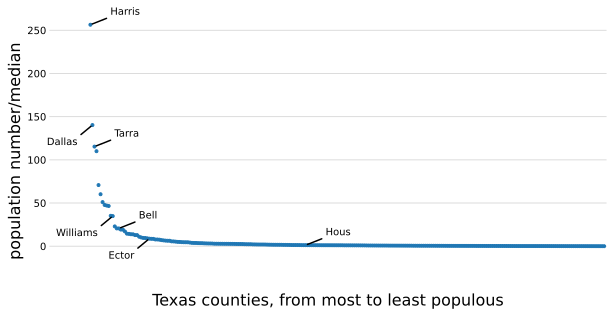

In [29]:
def plot_pops(ax, yscale, ylim, yticks, df_to_plot, df_annotations):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.grid(linestyle='-', color='lightgrey')

    ax.set_ylabel('population number/median', fontsize=16)
    ax.set_xlabel('Texas counties, from most to least populous', fontsize=16)

    # hide the tick markers of both axes by setting length to 0
    ax.tick_params(axis='both', which='both',length=0)
    ax.set_xlim([-20, len(df_to_plot)])
    ax.set_xticks([])

    ax.set(yscale=yscale)

    ax.set_ylim(ylim)
    ax.set_yticks(yticks)

    out = ax.plot(df_to_plot.index, df_to_plot.pop_ratio, color='C0', marker='o', markersize=3, linestyle='None')

    for indx, row in df_annotations.iterrows():
        if indx%2 ==0:
            xytext = (20, 10)
            relpos = (0., 0.)
            ha = 'left'

        else:
            xytext = (-15, -20)
            relpos = (1., 1.)
            ha = 'right'

        txt = row['CTYNAME'].rstrip(' County')

        ax.annotate(txt, # this is the text
                     (row['index'], row['pop_ratio']), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=xytext, # distance from text to points (x,y)
                     arrowprops=dict(facecolor='black', arrowstyle="-", linewidth=1.5, relpos=relpos),
                     ha=ha) # horizontal alignment can be left, right or center
    
    return out

fig, ax = plt.subplots(figsize=(10,5))

plot_pops(ax, yscale='linear', ylim=[-50,270], yticks=[0,50,100,150,200,250], df_to_plot=df_tmp, df_annotations=df_annotations[:7])

plt.show()

## The Log-Scale is Ideal for Ratios

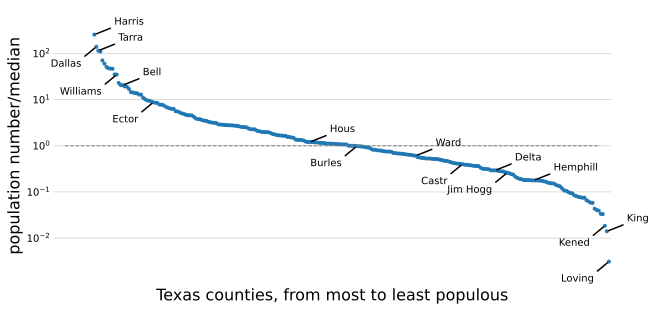

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

plot_pops(ax, yscale='log', ylim=[0.001, 1000], yticks=[0.01, 0.1, 1, 10, 100], df_to_plot=df_tmp, df_annotations=df_annotations)
ax.axhline(y=1, xmin=0.02, xmax=0.98, linewidth=1, linestyle='--', color='grey')

plt.show()

## Polar Coordinates

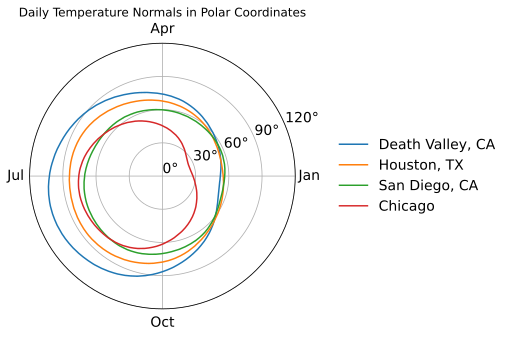

In [31]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

for code in ['USC00042319', 'USW00012918', 'USW00093107', 'USW00014819']:
    label = station_codes[code]
    df_tmp = df_temps[df_temps['STATION']==code]
    
    # convert day of the year to angle in radians:
    theta = df_tmp['DATETIME'].apply(lambda x: x.dayofyear/365.2425*2*math.pi)
    
    ax.plot(theta, df_tmp['DLY-TAVG-NORMAL'], label=label)


ax.set_rmin(0)
ax.set_rmax(90)
ax.set_rticks(np.arange(0,121,30))  # Less radial ticks
ax.yaxis.set_major_formatter('{x}$\degree$')

ax.tick_params(axis='y', which='major', labelsize=14)

ax.set_rlabel_position(22.5)  # Move radial labels away from plotted line

plt.thetagrids([0,90,180,270], labels=['Jan', 'Apr', 'Jul', 'Oct'], fontsize=14)

angle = np.deg2rad(0)
ax.legend(loc="center right",
         bbox_to_anchor=(1.3 + np.cos(angle)/2, .5 + np.sin(angle)/2),
         frameon=False,
         fontsize=14)

ax.set_title("Daily Temperature Normals in Polar Coordinates")
plt.show()